<a href="https://www.kaggle.com/code/kirtimathur/india-covid19-eda?scriptVersionId=116108336" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-india-status/latest Covid-19 India Status1.csv


# Basic Understanding of data

#### Loading the data set and checking its size

In [2]:
df=pd.read_csv("/kaggle/input/covid19-india-status/latest Covid-19 India Status1.csv")
df.shape

(36, 6)

#### Checking top 5 rows of the data

In [3]:
df.head()

,State/UTs,Total Cases,Active,Deaths,Active Ratio (%),Death Ratio (%)
0,Maharashtra,6122893,117869,123857,1.93,2.02
1,Kerala,3011694,108400,14108,3.60,0.47
2,Karnataka,2862338,39626,35601,1.38,1.24
3,Tamil Nadu,2506848,34076,33196,1.36,1.32
4,Andhra Pradesh,1911231,32356,12919,1.69,0.68


#### Basic information about data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State/UTs         36 non-null     object 
 1   Total Cases       36 non-null     int64  
 2   Active            36 non-null     int64  
 3   Deaths            36 non-null     int64  
 4   Active Ratio (%)  36 non-null     float64
 5   Death Ratio (%)   36 non-null     float64
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ KB


#### Checking Null values sum for columns of the dataset

In [5]:
df.isnull().sum()

State/UTs           0
Total Cases         0
Active              0
Deaths              0
Active Ratio (%)    0
Death Ratio (%)     0
dtype: int64

- There are no missing values.

#### Unique values and total number of unique values for all columns

In [6]:
for i in df.columns:
    print(i,"---------",df[i].unique(),"----------",df[i].nunique())

State/UTs --------- ['Maharashtra' 'Kerala' 'Karnataka' 'Tamil Nadu' 'Andhra Pradesh'
 'Uttar Pradesh' 'West Bengal' 'Delhi' 'Chhattisgarh' 'Rajasthan' 'Odisha'
 'Gujarat' 'Madhya Pradesh' 'Haryana' 'Bihar' 'Telengana' 'Punjab' 'Assam'
 'Jharkhand' 'Uttarakhand' 'Jammu and Kashmir' 'Himachal Pradesh' 'Goa'
 'Puducherry' 'Manipur' 'Tripura' 'Chandigarh' 'Meghalaya'
 'Arunachal Pradesh' 'Nagaland' 'Mizoram' 'Sikkim' 'Ladakh'
 'Dadra and Nagar Haveli and Daman and Diu' 'Lakshadweep'
 'Andaman and Nicobar'] ---------- 36
Total Cases --------- [6122893 3011694 2862338 2506848 1911231 1706934 1508223 1434780  996689
  952887  929788  824029  790070  769093  722850  629054  596970  524556
  346113  340959  317761  203117  168015  118416   74341   69019   61780
   52712   38283   25663   22703   21573   20143   10576    9965    7491] ---------- 36
Active --------- [117869 108400  39626  34076  32356   1947  16655    858   5017    935
  25148   1969    441   1066   1183  11472   1964  23371    

# Feature Engineering

#### Recovered cases, that is total cases after subtracting the sum of active and dead cases

In [7]:
recovered_cases= df['Total Cases'] - (df['Active'] + df['Deaths'])
df["recovered_cases"]=pd.Series(recovered_cases)

#### Recovered ratio, that is recovered cases with respect to total cases

In [8]:
recovered_ratio= df["recovered_cases"]/df['Total Cases']*100
df["recovered_ratio(%)"]=pd.Series(recovered_ratio)

In [9]:
df.head()

,State/UTs,Total Cases,Active,Deaths,Active Ratio (%),Death Ratio (%),recovered_cases,recovered_ratio(%)
0,Maharashtra,6122893,117869,123857,1.93,2.02,5881167,96.052095
1,Kerala,3011694,108400,14108,3.60,0.47,2889186,95.932256
2,Karnataka,2862338,39626,35601,1.38,1.24,2787111,97.371834
3,Tamil Nadu,2506848,34076,33196,1.36,1.32,2439576,97.316471
4,Andhra Pradesh,1911231,32356,12919,1.69,0.68,1865956,97.631108


# Exploratory Data Analyis (EDA)

#### Total cases of each state and union territory

In [10]:
k=df.groupby(["State/UTs"])["Total Cases"].agg(["max","min","sum"]).sort_values(by="max",ascending=False)
k.reset_index(inplace=True)
k

,State/UTs,max,min,sum
0,Maharashtra,6122893,6122893,6122893
1,Kerala,3011694,3011694,3011694
2,Karnataka,2862338,2862338,2862338
3,Tamil Nadu,2506848,2506848,2506848
4,Andhra Pradesh,1911231,1911231,1911231
5,Uttar Pradesh,1706934,1706934,1706934
6,West Bengal,1508223,1508223,1508223
7,Delhi,1434780,1434780,1434780
8,Chhattisgarh,996689,996689,996689
9,Rajasthan,952887,952887,952887


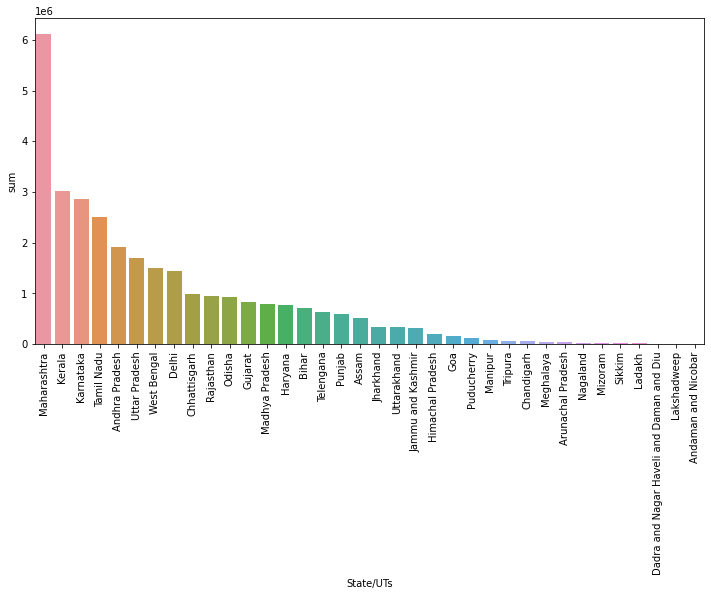

In [11]:
plt.figure(figsize=(12,6))
sns.barplot(k["State/UTs"],k["sum"],data=df)
plt.xticks(rotation=90)
plt.show()

- 1e6 means 1*10^6.
- Highest number of cases were in Maharashtra.
- Lowest number of cases were in Andaman and Nicobar islands.

#### Top 10 affected states

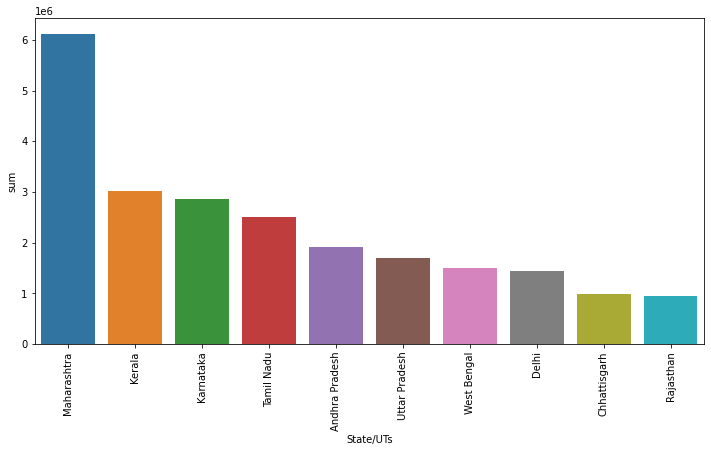

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(k["State/UTs"].head(10),k["sum"].head(10),data=df)
plt.xticks(rotation=90)
plt.show()

#### Bottom 10 affected states

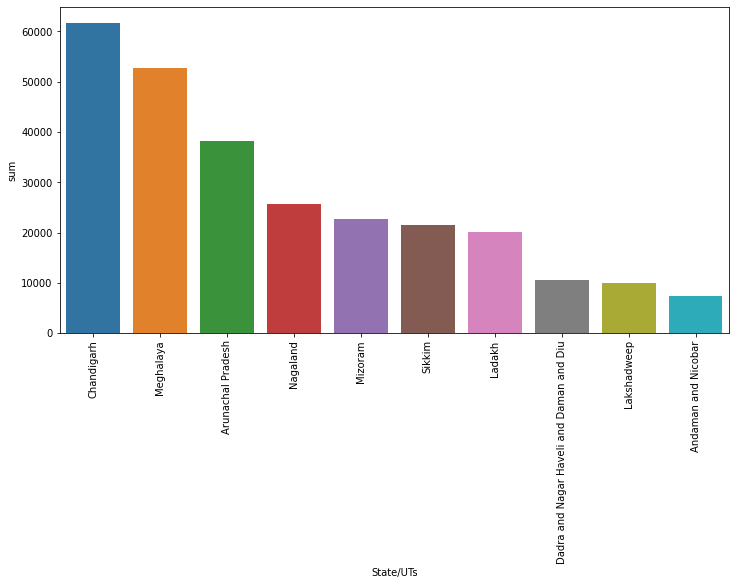

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(k["State/UTs"].tail(10),k["sum"].tail(10),data=df);
plt.xticks(rotation=90)
plt.show()

#### Percent distribution of total cases with respect to top 10 states

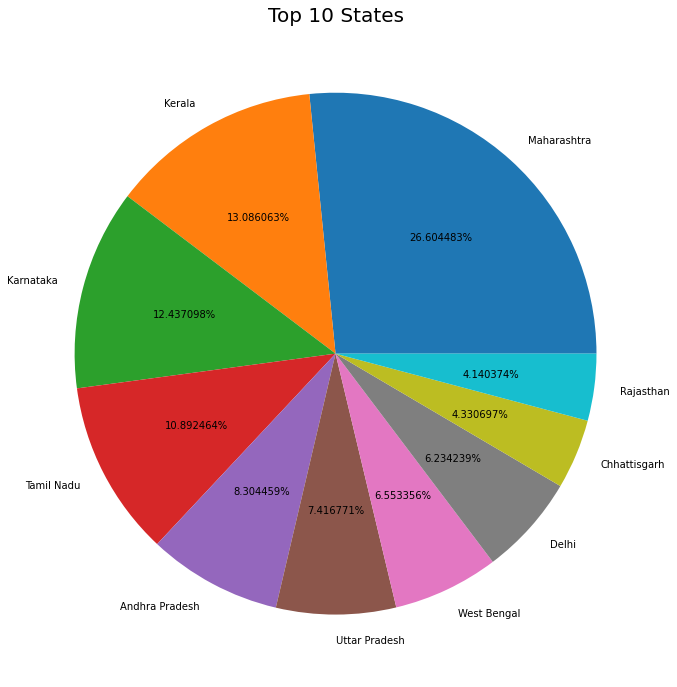

In [14]:
plt.figure(figsize=(24,12))
plt.pie(x=k["sum"].head(10),data=df,labels=k["State/UTs"].head(10),autopct="%1f%%");
plt.title("Top 10 States",fontsize=20)
plt.show()

#### Most affected and least affected states in terms of active ratio, that is active cases with respect to total cases.

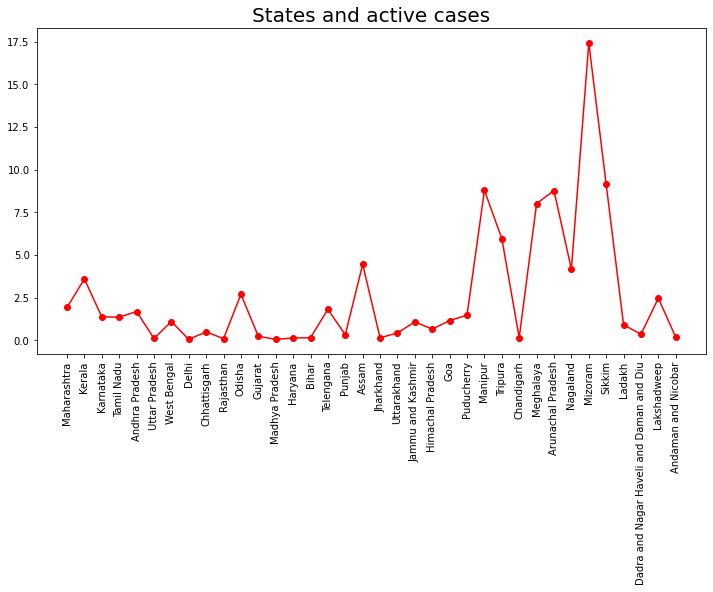

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df["State/UTs"],df["Active Ratio (%)"],color="red",marker="o")
plt.title("States and active cases",fontsize=20)
plt.xticks(rotation=90);

- Most active cases with respect to total cases at that time were at Mizoram, Arunachal Pradesh, Meghalaya, Manipur, Tripura, Assam and Sikkim, which all the eastern states of India.
- So, east of India was caught by this time by Corona virus.
- States in the north and middle India like Gujarat, Delhi, Haryana, Madhya Pradesh, and Bihar had the least active cases. 
- States in the south also had some active cases.

#### Most affected and least affected states in terms of death ratio, that is deaths with respect to total cases

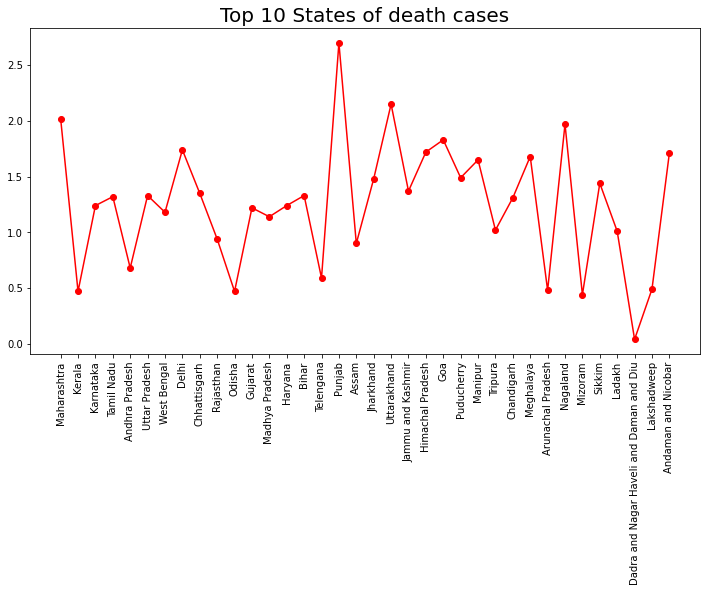

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df["State/UTs"],df["Death Ratio (%)"],color="red",marker="o")
plt.title("Top 10 States of death cases",fontsize=20)
plt.xticks(rotation=90);

- Most deaths with respect to total number of cases happened in Punjab.
- Least were in Dadra and Nagar Haveli and Daman and Diu.

#### State wise average recovery rate

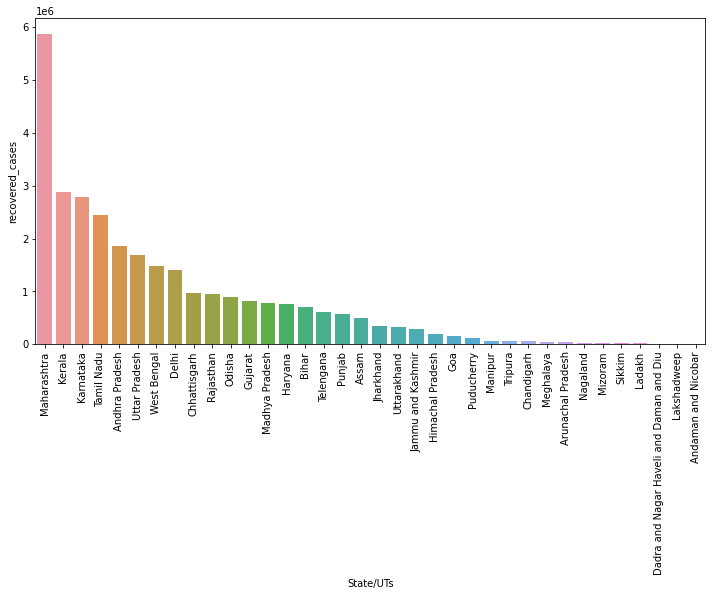

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(df["State/UTs"],df["recovered_cases"],data=df)
plt.xticks(rotation=90);

- Maharashtra had highest average recovery rate.
- Andaman and Nicobar had the least. 

In [18]:
df.groupby(["State/UTs"])["recovered_cases"].mean().sort_values(ascending=False)

State/UTs
Maharashtra                                 5881167.0
Kerala                                      2889186.0
Karnataka                                   2787111.0
Tamil Nadu                                  2439576.0
Andhra Pradesh                              1865956.0
Uttar Pradesh                               1682321.0
West Bengal                                 1473718.0
Delhi                                       1408917.0
Chhattisgarh                                 978208.0
Rajasthan                                    943010.0
Odisha                                       900282.0
Gujarat                                      811988.0
Madhya Pradesh                               780610.0
Haryana                                      758512.0
Bihar                                        712055.0
Telengana                                    613872.0
Punjab                                       578865.0
Assam                                        496442.0
Jharkhand         

- Maharashtra had highest average recovery rate corresponding to 5881167 recovered cases.
- Andaman and Nicobar had the least corresponding to 7349 recovered cases. 

#### Recovered ratio of each state

In [19]:
df.groupby(["State/UTs"])["recovered_ratio(%)"].mean().sort_values(ascending=False)

State/UTs
Dadra and Nagar Haveli and Daman and Diu    99.602874
Rajasthan                                   98.963466
Madhya Pradesh                              98.802638
Haryana                                     98.624224
Uttar Pradesh                               98.558058
Gujarat                                     98.538765
Chandigarh                                  98.530269
Bihar                                       98.506606
Jharkhand                                   98.367585
Delhi                                       98.197424
Chhattisgarh                                98.145761
Andaman and Nicobar                         98.104392
Ladakh                                      98.078737
West Bengal                                 97.712208
Andhra Pradesh                              97.631108
Himachal Pradesh                            97.625014
Telengana                                   97.586535
Uttarakhand                                 97.406140
Karnataka         

- Overall, recovered ratio, that is the recovery rate against the virus is fairly good in India. 
- Most states had more the 96% recovery rate. 

#### Trend of deaths, actives and recovered cases state wise

In [20]:
df.groupby(["Active","Deaths","recovered_cases"])["State/UTs"].sum()

Active  Deaths  recovered_cases
14      128     7349                                    Andaman and Nicobar
38      4       10534              Dadra and Nagar Haveli and Daman and Diu
99      809     60872                                            Chandigarh
183     204     19756                                                Ladakh
246     49      9670                                            Lakshadweep
441     9019    780610                                       Madhya Pradesh
532     5118    340463                                            Jharkhand
858     25005   1408917                                               Delhi
935     8942    943010                                            Rajasthan
1066    9515    758512                                              Haryana
1070    505     24088                                              Nagaland
1183    9612    712055                                                Bihar
1338    3486    198293                                  

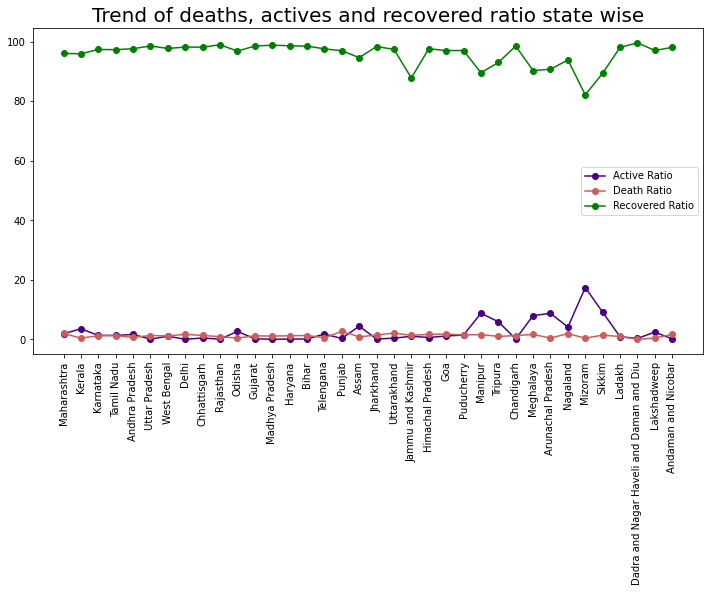

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df["State/UTs"],df["Active Ratio (%)"],color="indigo",marker="o",label="Active Ratio")
plt.plot(df["State/UTs"],df["Death Ratio (%)"],color="indianred",marker="o",label="Death Ratio")
plt.plot(df["State/UTs"],df["recovered_ratio(%)"],color="green",marker="o",label="Recovered Ratio")
plt.title("Trend of deaths, actives and recovered ratio state wise",fontsize=20)
plt.legend()
plt.xticks(rotation=90);

- There was a significant ratio difference in active and death ratio with respect to recovered ratio. 
- So, it can be infered that with respect to total cases, recovery for most states was highly appreciable. 